
# Final - Predicting Medical Cost with Regression
**Author:** AARON 
**Date:** November 24, 2025 
**Objective:** Create a Regression Model to predict Medical Claims.




## Introduction
- Using the Medical Cost Personal Dataset, decide what inputs to use in Regression model to predict Medical Claims.
- Try alternate methods or engineered variables to find an optimal model.


## Section 1. Import and Inspect the Data
 

### 1.1 Include Imports

In [429]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### 1.2 Load the dataset and display basic information

In [430]:


# Load the insurance dataset 
df = pd.read_csv("insurance.csv")

# Display structure and first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 1.3 Check for missing values and display summary statistics

In [431]:
# Check for missing values using the isnull() method and then the sum() method. 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [432]:
# Display summary statistics using the describe() method

print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Reflection 1: 
What do you notice about the dataset? The dataset is fully populated with 1338 records.
Are there any data issues?  There were no missing values.

## Section 2. Data Exploration and Preparation
### 2.1 Explore Data Patterns and Distributions

Map Sex and Smoker attributes to numeric numbers.
Use one hop encoding for regions.

In [433]:

# Map Smoker and Sex attributes to numeric numbers.
df['smoker_e'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex_e'] = df['sex'].map({'female': 1, 'male': 0})

# Use one hop encoding for regions.
df = pd.get_dummies(df, columns=['region'], dtype=int)

In [434]:
# Display summary statistics using the describe() method
print(df.describe())

               age          bmi     children       charges     smoker_e  \
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000   
mean     39.207025    30.663397     1.094918  13270.422265     0.204783   
std      14.049960     6.098187     1.205493  12110.011237     0.403694   
min      18.000000    15.960000     0.000000   1121.873900     0.000000   
25%      27.000000    26.296250     0.000000   4740.287150     0.000000   
50%      39.000000    30.400000     1.000000   9382.033000     0.000000   
75%      51.000000    34.693750     2.000000  16639.912515     0.000000   
max      64.000000    53.130000     5.000000  63770.428010     1.000000   

             sex_e  region_northeast  region_northwest  region_southeast  \
count  1338.000000       1338.000000       1338.000000       1338.000000   
mean      0.494768          0.242152          0.242900          0.272048   
std       0.500160          0.428546          0.428995          0.445181   
min       0.000000  

In [435]:
# Check for correlations using the corr() method and tell it to use only the numeric features. 
print(df.corr(numeric_only=True))

                       age       bmi  children   charges  smoker_e     sex_e  \
age               1.000000  0.109272  0.042469  0.299008 -0.025019  0.020856   
bmi               0.109272  1.000000  0.012759  0.198341  0.003750 -0.046371   
children          0.042469  0.012759  1.000000  0.067998  0.007673 -0.017163   
charges           0.299008  0.198341  0.067998  1.000000  0.787251 -0.057292   
smoker_e         -0.025019  0.003750  0.007673  0.787251  1.000000 -0.076185   
sex_e             0.020856 -0.046371 -0.017163 -0.057292 -0.076185  1.000000   
region_northeast  0.002475 -0.138156 -0.022808  0.006349  0.002811  0.002425   
region_northwest -0.000407 -0.135996  0.024806 -0.039905 -0.036945  0.011156   
region_southeast -0.011642  0.270025 -0.023066  0.073982  0.068498 -0.017117   
region_southwest  0.010016 -0.006205  0.021914 -0.043210 -0.036945  0.004184   

                  region_northeast  region_northwest  region_southeast  \
age                       0.002475         -0

In [436]:
# Check for missing values using the isnull() method and then the sum() method. 
df.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
smoker_e            0
sex_e               0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

### 2.2 Feature Engineering

Create a variable that adds BMI with age.  Also multiply that sum by 3 if a smoker.

In [437]:
# Create numeric variable for age and twice bmi
df['3ptindex'] = (df['age'] + df['bmi'] ) * ( 2 * df['smoker_e'] + 1)



## Section 3. Feature Selection and Justification
### 3.1 Choose features and target



Case 1: 
input features: "age", "bmi", "children", "charges", "smoker_e", "sex_e", "region_northeast", "region_northwest", "region_southeast", "region_southwest" 
target: "charges"

Case 2:
input features: '3ptindex'
target: "charges"



### 3.2 Define X and y

Assign input features to X a pandas DataFrame with 1 or more input features
Assign target variable to y (as applicable) - a pandas Series with a single target feature

In [438]:
# Define input features (X) and target (y) 
# All numberic features in the data frame.  Also don't inlude "bmi_age".
# Target: charges 

X1 = df.drop(columns=['charges', 'sex', 'smoker', '3ptindex'])  # Features
y1 = df['charges']  # Target

X2 = df[['3ptindex']]  # Features
y2 = df['charges']  # Target


In [439]:
# X1 Inputes 
X1.head()

,age,bmi,children,smoker_e,sex_e,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,1,0,0,0,1
1,18,33.770,1,0,0,0,0,1,0
2,28,33.000,3,0,0,0,0,1,0
3,33,22.705,0,0,0,0,1,0,0
4,32,28.880,0,0,0,0,1,0,0


In [440]:
# X2 Inputes 
X2.head()

,3ptindex
0,140.700
1,51.770
2,61.000
3,55.705
4,60.880


### Reflection 2 and 3:
- This dataset just had a handful of inputs to choose from.  I elected to add age and bmi then multiply that sum by 3 if a smoker as case 2.
- I also decided to include all inputs in case 1 to compare the results to my single engineered input.

## Section 4. Train a Regression Model (Linear Regression)
 

Split the data into training and test sets.

### 4.1 Split the Data

In [441]:

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)



### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)
Create and train all 4 cases.

In [442]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)

# Predictions

y1_pred_train = lr_model1.predict(X1_train)
y1_pred_test = lr_model1.predict(X1_test)

y2_pred_train = lr_model2.predict(X2_train)
y2_pred_test = lr_model2.predict(X2_test)


### 4.3 Evaluate Model Performance

In [443]:
print("Case 1: Training R²:", r2_score(y1_train, y1_pred_train))
print("Case 1: Test R²:", r2_score(y1_test, y1_pred_test))
print("Case 1: Test RMSE:", mean_squared_error(y1_test, y1_pred_test))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y1_pred_test))



Case 1: Training R²: 0.7376151899509507
Case 1: Test R²: 0.8001744488359046
Case 1: Test RMSE: 30552437.41652549
Case 1: Test MAE: 4013.100618113485


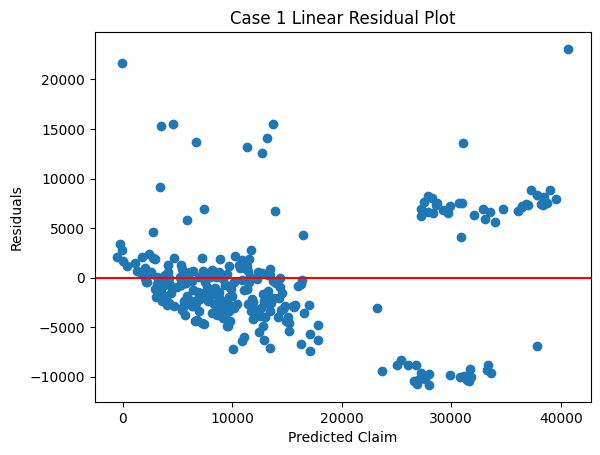

In [444]:
residuals = y1_test - y1_pred_test
plt.scatter(y1_pred_test, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Claim")
plt.ylabel("Residuals")
plt.title("Case 1 Linear Residual Plot")
plt.show()

In [445]:
print("Case 2: Training R²:", r2_score(y2_train, y2_pred_train))
print("Case 2: Test R²:", r2_score(y2_test, y2_pred_test))
print("Case 2: Test RMSE:", mean_squared_error(y2_test, y2_pred_test))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y2_pred_test))

Case 2: Training R²: 0.7454459600374025
Case 2: Test R²: 0.824765332284362
Case 2: Test RMSE: 26792600.783025622
Case 2: Test MAE: 3659.4811199826368


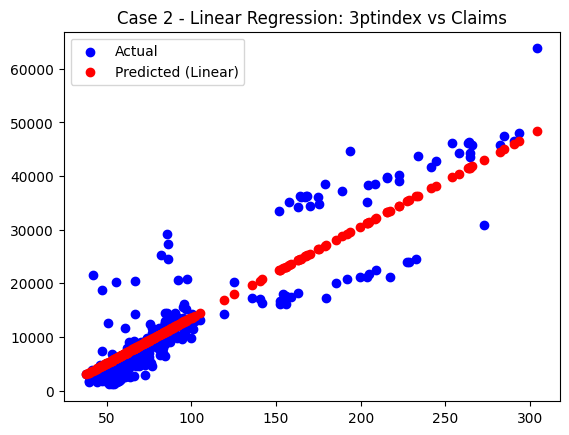

In [462]:
plt.scatter(X2_test, y2_test, color='blue', label='Actual')
plt.scatter(X2_test, y2_pred_test, color='red', label='Predicted (Linear)')
plt.legend()
plt.title("Case 2 - Linear Regression: 3ptindex vs Claims")
plt.show()

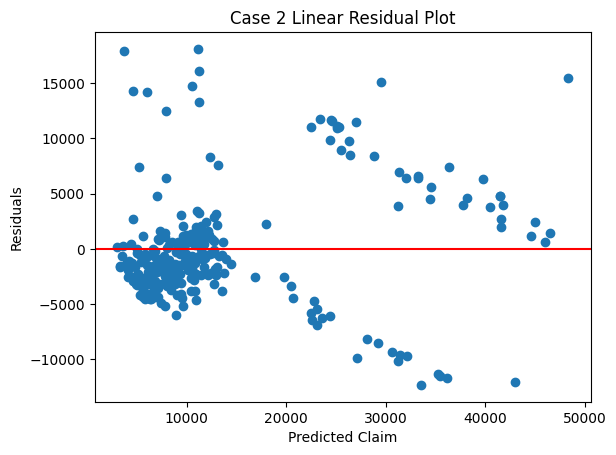

In [461]:
residuals = y2_test - y2_pred_test
plt.scatter(y2_pred_test, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Claim")
plt.ylabel("Residuals")
plt.title("Case 2 Linear Residual Plot")
plt.show()

### Reflection 4:
Compare the train vs test results for each.


| Model Type        | Case   | Features Used                 | Training R² | Test R²   | RMSE     | MAE    | Notes |
|-------------------|--------|-------------------------------|-------------|-----------|----------|--------|-------|
| Linear Regression | Case 1 | all features                  | 0.7376      | 0.8001    | 30552437 | 4013   | -     |
| Linear Regression | Case 2 | 3ptindex                      | 0.7454      | 0.8247    | 26792600 | 3659   | -     |


- Did Case 1 overfit or underfit? Case 1 is in the nominal range.
- Did Case 2 overfit or underfit? Case 2 is in the nominal range.


### Adding Age + BMI * (2 * Smoker + 1)

- Did adding 3pt index improve the model: The model improved measurably from Case 1 to Case 2.
- Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that):  The 3ptindex formula keeps non-smoker claims as is in determining claims.  But if someone is a smoker it amplifies the age and bmi by 3 times.  This helps the linear regression with these higher values.  
- At first I just had 2 times, but I tried 3 times and the results were better.  
- I did not need to use the other parameters either and still achieved better results.
- I wanted just a single variable to see the plot and in some ways stumbled into a great model.



## Section 5. Compare Alternative Models



### 5.1 Ridge Regression (L2 penalty)

In [448]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X1_train, y1_train)
y_pred_ridge = ridge_model.predict(X1_test)


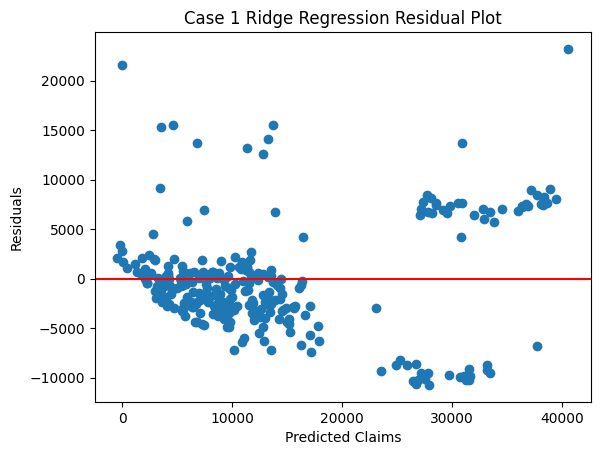

In [449]:
residuals = y1_test - y_pred_ridge
plt.scatter(y_pred_ridge, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Claims")
plt.ylabel("Residuals")
plt.title("Case 1 Ridge Regression Residual Plot")
plt.show()

### 5.2 Elastic Net (L1 + L2 combined)

In [450]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X1_train, y1_train)
y_pred_elastic = elastic_model.predict(X1_test)

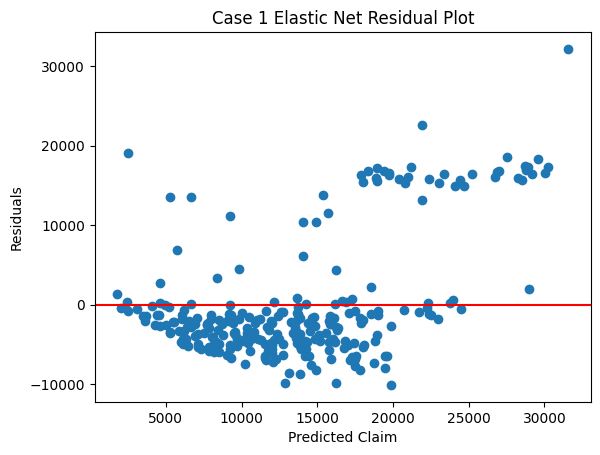

In [451]:
residuals = y1_test - y_pred_elastic
plt.scatter(y_pred_elastic, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Claim")
plt.ylabel("Residuals")
plt.title("Case 1 Elastic Net Residual Plot")
plt.show()

### 5.3 Polynomial Regression

In [452]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X1_train)
X_test_poly = poly.transform(X1_test)

In [453]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y1_train)
ycase1_pred_poly = poly_model.predict(X_test_poly)

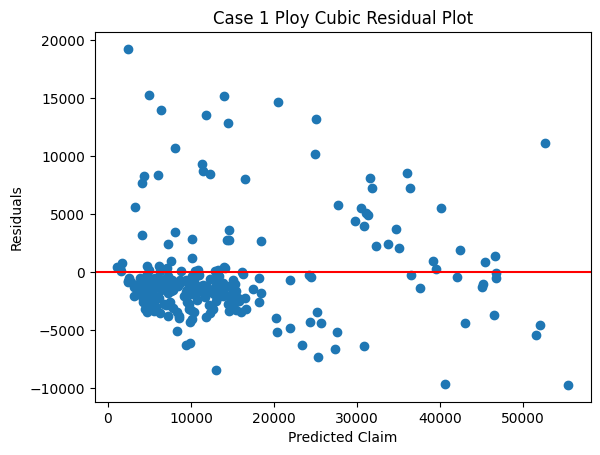

In [454]:
residuals = y1_test - ycase1_pred_poly
plt.scatter(ycase1_pred_poly, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Claim")
plt.ylabel("Residuals")
plt.title("Case 1 Ploy Cubic Residual Plot")
plt.show()

### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)

In [455]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X2_train_poly = poly.fit_transform(X2_train)
X2_test_poly = poly.transform(X2_test)

In [456]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X2_train_poly, y2_train)
y2cubic_pred_poly = poly_model.predict(X2_test_poly)

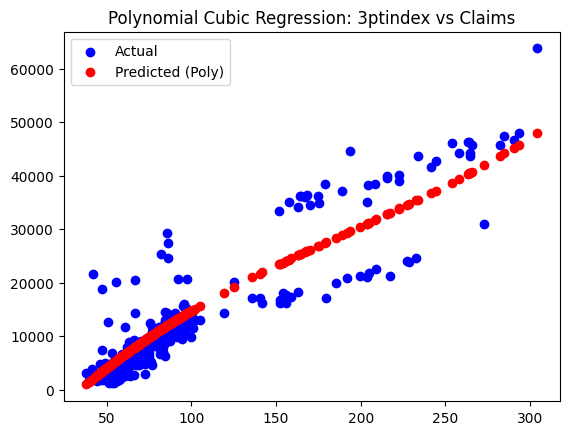

In [457]:
plt.scatter(X2_test, y2_test, color='blue', label='Actual')
plt.scatter(X2_test, y2cubic_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Cubic Regression: 3ptindex vs Claims")
plt.show()

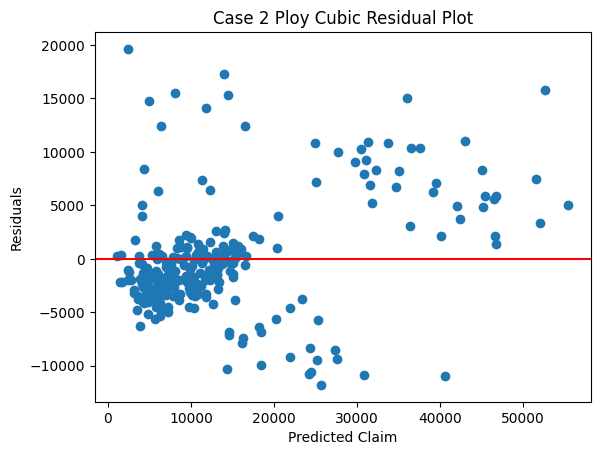

In [458]:
residuals = y2_test - y2cubic_pred_poly
plt.scatter(ycase1_pred_poly, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Claim")
plt.ylabel("Residuals")
plt.title("Case 2 Ploy Cubic Residual Plot")
plt.show()

In [459]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Polynomial Cubic Case 2", y2_test, y2cubic_pred_poly)

Polynomial Cubic Case 2 R²: 0.824
Polynomial Cubic Case 2 RMSE: 26873381.15
Polynomial Cubic Case 2 MAE: 3686.53



### 5.5 Reflection
- What patterns does the cubic model seem to capture:  It is very hard to know for case 1 with all the inputs.  For case 2 it matched the data slightly better than linear regression.
- Where does it perform well or poorly:  According to the residuals plot the result is very balanced for case 1.  I see some values on both sides of zero which is desirable. For case 2, there is still some balance, but it is not quite as good as case 1.
- Did the polynomial fit outperform linear regression: Yes the R² value 0.888 for poly but 0.80 for Linear for case 1.  For case 2 the results were almost the same.
- Where (on the graph or among which kinds of data points) does it fit best:  The prediction works well for smokers and non-smokers for case 1 and case 2. 

| Model Type    | Case   | Features Used                 | Test R²   | RMSE     | MAE    | Notes |
|---------------|--------|-------------------------------|-----------|----------|--------|-------|
| Linear        | Case 1 | All Inputs                    | 0.800     | 30552437 | 4013   | -     |
| Poly Cubic    | Case 1 | All Inputs                    | 0.888     | 17093508 | 2772   | -     |
| Linear        | Case 2 | 3ptindex                      | 0.825     | 26792600 | 3659   | -     |
| Poly Cubic    | Case 2 | 3ptindex                      | 0.824     | 26873381 | 3686   | -     |

### 5.6 Compare All Models

In [460]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear Case 1", y1_test, y1_pred_test)
report("Ridge Case 1", y1_test, y_pred_ridge)
report("ElasticNet Case 1", y1_test, y_pred_elastic)
report("Polynomial Cubic Case 1", y1_test, ycase1_pred_poly)
report("Linear Case 2", y2_test, y2_pred_test)
report("Polynomial Cubic Case 2", y2_test, y2cubic_pred_poly)


Linear Case 1 R²: 0.800
Linear Case 1 RMSE: 30552437.42
Linear Case 1 MAE: 4013.10

Ridge Case 1 R²: 0.800
Ridge Case 1 RMSE: 30632410.86
Ridge Case 1 MAE: 4025.35

ElasticNet Case 1 R²: 0.610
ElasticNet Case 1 RMSE: 59577764.02
ElasticNet Case 1 MAE: 5621.09

Polynomial Cubic Case 1 R²: 0.888
Polynomial Cubic Case 1 RMSE: 17093508.34
Polynomial Cubic Case 1 MAE: 2772.78

Linear Case 2 R²: 0.825
Linear Case 2 RMSE: 26792600.78
Linear Case 2 MAE: 3659.48

Polynomial Cubic Case 2 R²: 0.824
Polynomial Cubic Case 2 RMSE: 26873381.15
Polynomial Cubic Case 2 MAE: 3686.53




| Model Type    | Case   | Features Used                 | Test R²   | RMSE     | MAE    | Notes |
|---------------|--------|-------------------------------|-----------|----------|--------|-------|
| Linear        | Case 1 | All Imputs                    | 0.800     | 30552437 | 4013   | -     |
| Ridge         | Case 1 | All Imputs                    | 0.800     | 30632410 | 4025   | -     |
| ElasticNet    | Case 1 | All Imputs                    | 0.610     | 59577764 | 5621   | -     |
| Poly Cubic    | Case 1 | All Imputs                    | 0.888     | 17093508 | 2772   | -     |
| Linear        | Case 2 | 3ptindex                      | 0.825     | 26792600 | 3659   | -     |
| Poly Cubic    | Case 2 | 3ptindex                      | 0.824     | 26873381 | 3686   | -     |

### Reflection 5.7:
- There was just one model that outperformed and that was Polynomial Cubic on Case 1.  It did much better than all other models.  I'm not sure why as it is hard to visualize the data.
- The other models did not perform better than Linear Regression on Case 1.  
- The Polynomial Cubic on Case 2 was slightly underperforming the Linear Regression on Case 2.

## Section 6. Final Thoughts & Insights

### 6.1 Summarize Findings


- What features were most useful?  The engineered feature 3ptindex was a very powerful predictor of claims.

- What regression model performed best?  The Polynomial Cubic Model iterated on Case 1 had the best metrics.  The next best model was Case 2 and a simple Linear Regression.  It performed better than all of Case 1 except the Polynomial Cubic Model, and case 1 had all the inputs whereas Case 2 just had the single 3ptindex input.  
- You could see this in the residual graphics.  The Case 1 Cubic Model did have a quality distribution in the residual graphic.  To the eye the Case 2 Linear Model had the next best residual graphic.  Meaning the data points were around the zero line and not all on one side.  One also wants to see the points close to 0.

### 6.2 Discuss challenges faced.
- I had a hard time visualizing all the inputs for case 1.  That is what drove me to find one variable so I could see the regression line and polynomial cubic line.
- It was a challenge finding a single engineered variable that described the data.  But I did, and I am very pleased with the results.  It performed better that most of the models with all the inputs.

### 6.3 If you had more time, what would you try next?
- I would try adding more inputs to Case 2. 
- I would try Ridge Regression and ElasticNet, but try varying the parameters.  
- I also would try voting.

